In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data_path='/content/drive/My Drive/dataset'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'with_mask': 0, 'without_mask': 1}

In [ ]:
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names= os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(100,100))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=data.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_target,
  epochs=30,
  callbacks=[checkpoint],
  validation_split=0.2)


Epoch 1/30
32/32 [==============================] - 19s 584ms/step - loss: 0.0667 - acc: 0.9719 - val_loss: 0.2533 - val_acc: 0.9080
Epoch 2/30
32/32 [==============================] - 18s 573ms/step - loss: 0.0698 - acc: 0.9759 - val_loss: 0.0721 - val_acc: 0.9600
Epoch 3/30
32/32 [==============================] - 18s 575ms/step - loss: 0.0616 - acc: 0.9799 - val_loss: 0.0526 - val_acc: 0.9840
Epoch 4/30
32/32 [==============================] - 18s 575ms/step - loss: 0.0723 - acc: 0.9709 - val_loss: 0.0513 - val_acc: 0.9800
Epoch 5/30
32/32 [==============================] - 18s 547ms/step - loss: 0.0624 - acc: 0.9799 - val_loss: 0.0648 - val_acc: 0.9760
Epoch 6/30
32/32 [==============================] - 19s 579ms/step - loss: 0.0637 - acc: 0.9749 - val_loss: 0.0466 - val_acc: 0.9800
Epoch 7/30
32/32 [==============================] - 17s 545ms/step - loss: 0.0604 - acc: 0.9799 - val_loss: 0.1777 - val_acc: 0.9280
Epoch 8/30
32/32 [==============================] - 17s 544ms/step - 

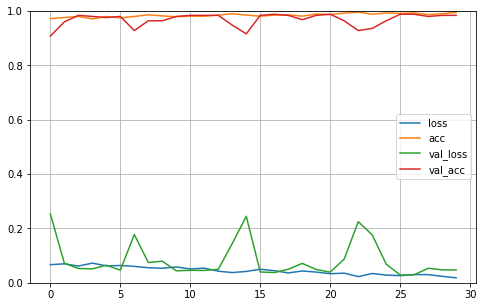

<Figure size 576x432 with 0 Axes>

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


figure = plt.gcf() 
figure.set_size_inches(8, 6) 
#plt.savefig('filename.png', bbox_inches='tight')
plt.savefig('loss_accuracy_graph.png',dpi=300, bbox_inches='tight')

In [ ]:
model.save("model1.h5")

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 98ms/step - loss: 0.0425 - acc: 0.9928
[0.042546506971120834, 0.9928057789802551]


### Accuracy : 99.28%

In [ ]:
new=test_data[:5]

In [ ]:
y_pred = model.predict_classes(new)

print(y_pred)
print(label_dict)

[[1]
 [1]
 [1]
 [0]
 [1]]
{'with_mask': 0, 'without_mask': 1}


AxesImage(54,36;334.8x217.44)


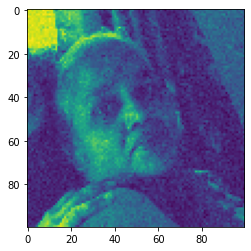

In [ ]:
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


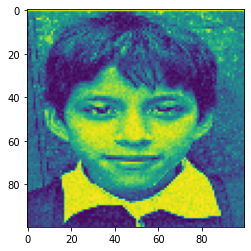

In [ ]:
print(plt.imshow(test_data[1].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


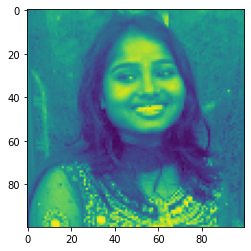

In [ ]:
print(plt.imshow(test_data[2].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


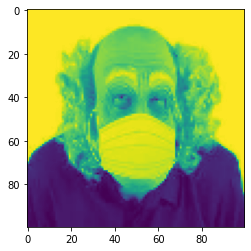

In [ ]:
print(plt.imshow(test_data[3].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


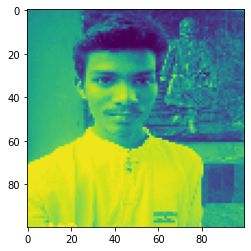

In [ ]:
print(plt.imshow(test_data[4].reshape(100,100)))